Note: The filepaths in this notebook are no longer valid. This notebook is meant only to be viewed as a reference. All of the code in this notebook has been adapted into [02-data_cleaning.py](./../src/data/02-data_cleaning.py)

# Import data

In [31]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set default plot figure size and font size
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['font.size'] = 20

In [32]:
# Import data
data_M1_complete = pd.read_csv("./data/M1_data.csv", index_col='id')
data_M2_complete = pd.read_csv("./data/M2_data.csv", index_col='id')
data_M3_complete = pd.read_csv("./data/M3_data.csv", index_col='id')
data_M4_complete = pd.read_csv("./data/M4_data.csv", index_col='id')
data_M5_complete = pd.read_csv("./data/M5_data.csv", index_col='id')

predictors = pd.read_csv("./data/predictors.csv", index_col='id')
response = pd.read_csv("./data/response.csv")

In [33]:
# Remove rows with missing fat pct from each imputed dataset
data_M1 = data_M1_complete.copy()[data_M1_complete['total_fat_pct'].notna()]
data_M2 = data_M2_complete.copy()[data_M2_complete['total_fat_pct'].notna()]
data_M3 = data_M3_complete.copy()[data_M3_complete['total_fat_pct'].notna()]
data_M4 = data_M4_complete.copy()[data_M4_complete['total_fat_pct'].notna()]
data_M5 = data_M5_complete.copy()[data_M5_complete['total_fat_pct'].notna()]

## Smoking

Does there appear to be any significant effect between total fat percentage and whether an individual has smoked at least 100 cigarettes in their life?

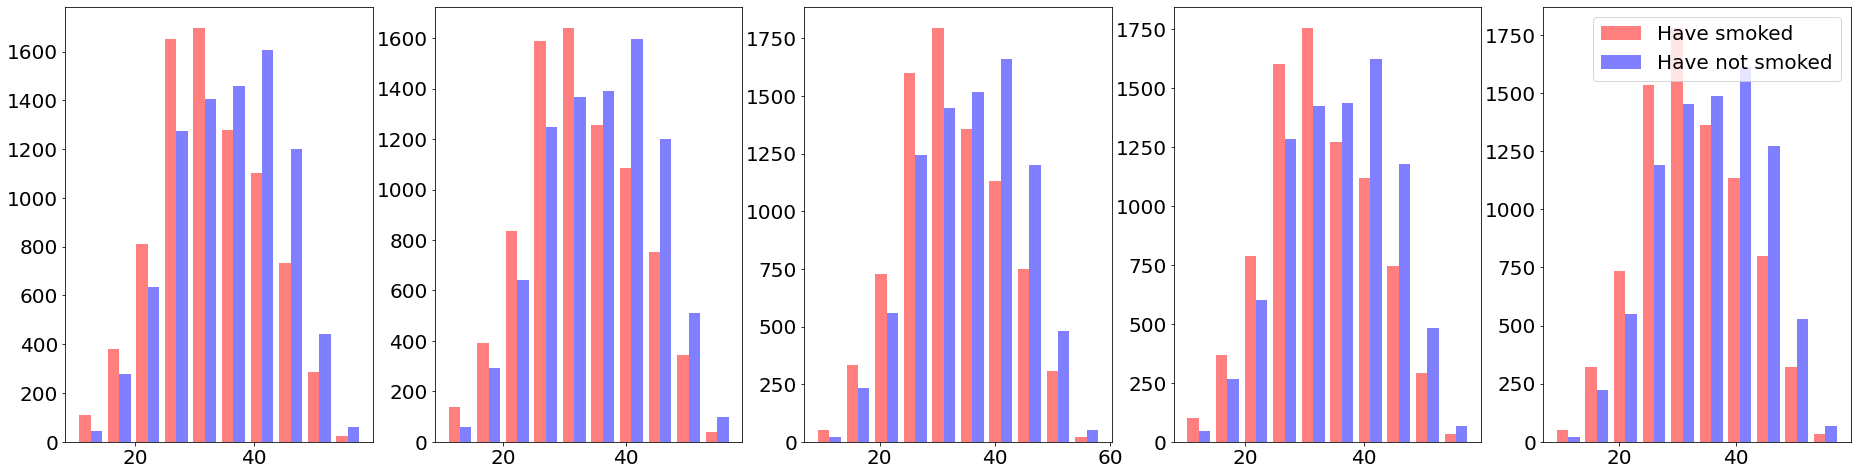

In [37]:
# Resize figure
plt.rcParams['figure.figsize'] = [32,8]

# Initialize plot
fig_smqhist, ax_smqhist = plt.subplots(nrows=1, ncols=5)

# Filter data
fatpct_havesmokedM1 = data_M1[data_M1['has_smoked'] == 1]['total_fat_pct']
fatpct_neversmokedM1 = data_M1[data_M1['has_smoked'] == 2]['total_fat_pct']

fatpct_havesmokedM2 = data_M2[data_M2['has_smoked'] == 1]['total_fat_pct']
fatpct_neversmokedM2 = data_M2[data_M2['has_smoked'] == 2]['total_fat_pct']

fatpct_havesmokedM3 = data_M3[data_M3['has_smoked'] == 1]['total_fat_pct']
fatpct_neversmokedM3 = data_M3[data_M3['has_smoked'] == 2]['total_fat_pct']

fatpct_havesmokedM4 = data_M4[data_M4['has_smoked'] == 1]['total_fat_pct']
fatpct_neversmokedM4 = data_M4[data_M4['has_smoked'] == 2]['total_fat_pct']

fatpct_havesmokedM5 = data_M5[data_M5['has_smoked'] == 1]['total_fat_pct']
fatpct_neversmokedM5 = data_M5[data_M5['has_smoked'] == 2]['total_fat_pct']

ax_smqhist[0].hist([fatpct_havesmokedM1, fatpct_neversmokedM1], color=['r', 'b'], alpha=0.5)
ax_smqhist[1].hist([fatpct_havesmokedM2, fatpct_neversmokedM2], color=['r', 'b'], alpha=0.5)
ax_smqhist[2].hist([fatpct_havesmokedM3, fatpct_neversmokedM3], color=['r', 'b'], alpha=0.5)
ax_smqhist[3].hist([fatpct_havesmokedM4, fatpct_neversmokedM4], color=['r', 'b'], alpha=0.5)
ax_smqhist[4].hist([fatpct_havesmokedM5, fatpct_neversmokedM5], color=['r', 'b'], label=['Have smoked', 'Have not smoked'], alpha=0.5)
ax_smqhist[4].legend()

# plt.show()
plt.savefig('./graphs/smoking_hist.png')

In [38]:
pd.DataFrame({
    "X": ["M1", "M2", "M3", "M4", "M5", "Counts"],
    "Mean Fat Percentage among Smokers": [
        np.round(fatpct_havesmokedM1.mean(), 3),
        np.round(fatpct_havesmokedM2.mean(), 3),
        np.round(fatpct_havesmokedM3.mean(), 3),
        np.round(fatpct_havesmokedM4.mean(), 3),
        np.round(fatpct_havesmokedM5.mean(), 3),
        len(fatpct_havesmokedM1)
    ],
    "Mean Fat Percentage among Non-Smokers": [
        np.round(fatpct_neversmokedM1.mean(), 3),
        np.round(fatpct_neversmokedM2.mean(), 3),
        np.round(fatpct_neversmokedM3.mean(), 3),
        np.round(fatpct_neversmokedM4.mean(), 3),
        np.round(fatpct_neversmokedM5.mean(), 3),
        len(fatpct_neversmokedM1)
    ],
}).set_index('X').T

X                                          M1      M2      M3      M4      M5  \
Mean Fat Percentage among Smokers      32.922  32.936  32.930  32.936  32.918   
Mean Fat Percentage among Non-Smokers  35.510  35.512  35.509  35.506  35.523   

X                                      Counts  
Mean Fat Percentage among Smokers      8073.0  
Mean Fat Percentage among Non-Smokers  8407.0

### Two Sample T-Test
$H_0$: The mean body fat percentages of smokers and non-smokers are equal  
$H_A$: The mean body fat percentages of smokers and non-smokers are not equal

In [39]:
pd.DataFrame([
    stats.ttest_ind(a=fatpct_havesmokedM1, b=fatpct_neversmokedM1, equal_var=True),
    stats.ttest_ind(a=fatpct_havesmokedM2, b=fatpct_neversmokedM2, equal_var=True),
    stats.ttest_ind(a=fatpct_havesmokedM3, b=fatpct_neversmokedM3, equal_var=True),
    stats.ttest_ind(a=fatpct_havesmokedM4, b=fatpct_neversmokedM4, equal_var=True),
    stats.ttest_ind(a=fatpct_havesmokedM5, b=fatpct_neversmokedM5, equal_var=True)
]).set_index(np.array(["M1", "M2", "M3", "M4", "M5"]))

statistic        pvalue
M1 -19.014260  9.276432e-80
M2 -18.877110  1.188107e-78
M3 -18.934968  4.060530e-79
M4 -18.839202  2.396665e-78
M5 -19.106526  1.652148e-80

Among those who have smoked at least 100 cigarettes in their life, is there an effect between whether they still smoke and their body fat percentage??

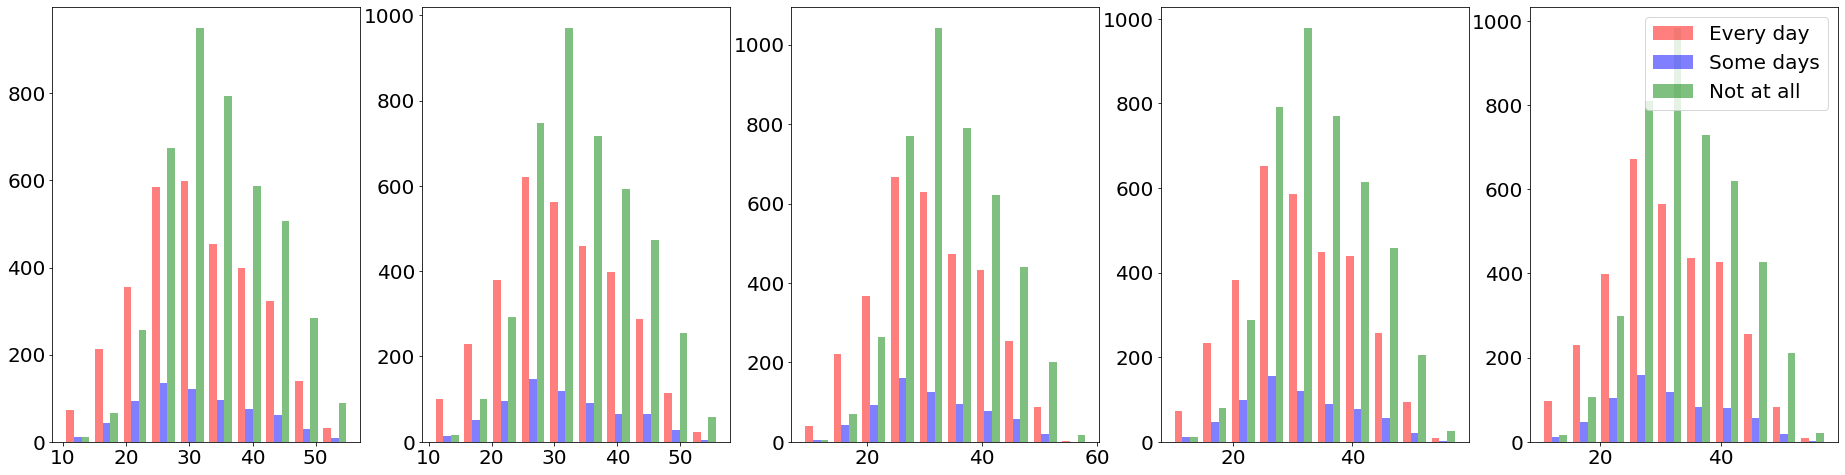

<Figure size 2304x576 with 0 Axes>

In [40]:
# Initialize plot
fig_smqhist2, ax_smqhist2 = plt.subplots(nrows=1, ncols=5)

# Filter data
fatpct_smokeeverydayM1 = data_M1[data_M1['is_smoker'] == 1]['total_fat_pct']
fatpct_smokesomedaysM1 = data_M1[data_M1['is_smoker'] == 2]['total_fat_pct']
fatpct_nolongersmokeM1 = data_M1[data_M1['is_smoker'] == 3]['total_fat_pct']

fatpct_smokeeverydayM2 = data_M2[data_M2['is_smoker'] == 1]['total_fat_pct']
fatpct_smokesomedaysM2 = data_M2[data_M2['is_smoker'] == 2]['total_fat_pct']
fatpct_nolongersmokeM2 = data_M2[data_M2['is_smoker'] == 3]['total_fat_pct']

fatpct_smokeeverydayM3 = data_M3[data_M3['is_smoker'] == 1]['total_fat_pct']
fatpct_smokesomedaysM3 = data_M3[data_M3['is_smoker'] == 2]['total_fat_pct']
fatpct_nolongersmokeM3 = data_M3[data_M3['is_smoker'] == 3]['total_fat_pct']

fatpct_smokeeverydayM4 = data_M4[data_M4['is_smoker'] == 1]['total_fat_pct']
fatpct_smokesomedaysM4 = data_M4[data_M4['is_smoker'] == 2]['total_fat_pct']
fatpct_nolongersmokeM4 = data_M4[data_M4['is_smoker'] == 3]['total_fat_pct']

fatpct_smokeeverydayM5 = data_M5[data_M5['is_smoker'] == 1]['total_fat_pct']
fatpct_smokesomedaysM5 = data_M5[data_M5['is_smoker'] == 2]['total_fat_pct']
fatpct_nolongersmokeM5 = data_M5[data_M5['is_smoker'] == 3]['total_fat_pct']

ax_smqhist2[0].hist([fatpct_smokeeverydayM1, fatpct_smokesomedaysM1, fatpct_nolongersmokeM1], color=['r', 'b', 'g'], alpha=0.5)
ax_smqhist2[1].hist([fatpct_smokeeverydayM2, fatpct_smokesomedaysM2, fatpct_nolongersmokeM2], color=['r', 'b', 'g'], alpha=0.5)
ax_smqhist2[2].hist([fatpct_smokeeverydayM3, fatpct_smokesomedaysM3, fatpct_nolongersmokeM3], color=['r', 'b', 'g'], alpha=0.5)
ax_smqhist2[3].hist([fatpct_smokeeverydayM4, fatpct_smokesomedaysM4, fatpct_nolongersmokeM4], color=['r', 'b', 'g'], alpha=0.5)
ax_smqhist2[4].hist([fatpct_smokeeverydayM5, fatpct_smokesomedaysM5, fatpct_nolongersmokeM5], color=['r', 'b', 'g'], label=['Every day', 'Some days', 'Not at all'], alpha=0.5)

ax_smqhist2[4].legend()

plt.show()
plt.savefig('./graphs/smoking_current_hist.png')

In [41]:
pd.DataFrame({
    "X": ["M1", "M2", "M3", "M4", "M5", "Counts"],
    "Mean Fat Percentage among Every-Day Smokers": [
        np.round(fatpct_smokeeverydayM1.mean(), 3), 
        np.round(fatpct_smokeeverydayM2.mean(), 3), 
        np.round(fatpct_smokeeverydayM3.mean(), 3), 
        np.round(fatpct_smokeeverydayM4.mean(), 3), 
        np.round(fatpct_smokeeverydayM5.mean(), 3),
        len(fatpct_smokeeverydayM1)
    ],
    "Mean Fat Percentage among Some-Day Smokers": [
        np.round(fatpct_smokesomedaysM1.mean(), 3), 
        np.round(fatpct_smokesomedaysM2.mean(), 3), 
        np.round(fatpct_smokesomedaysM3.mean(), 3), 
        np.round(fatpct_smokesomedaysM4.mean(), 3), 
        np.round(fatpct_smokesomedaysM5.mean(), 3),
        len(fatpct_smokesomedaysM1)
    ],
    "Mean Fat Percentage among Ex-Smokers": [
        np.round(fatpct_nolongersmokeM1.mean(), 3), 
        np.round(fatpct_nolongersmokeM2.mean(), 3), 
        np.round(fatpct_nolongersmokeM3.mean(), 3), 
        np.round(fatpct_nolongersmokeM4.mean(), 3), 
        np.round(fatpct_nolongersmokeM5.mean(), 3),
        len(fatpct_nolongersmokeM1)
    ]
}).set_index('X').T

X                                                M1      M2      M3      M4  \
Mean Fat Percentage among Every-Day Smokers  31.462  31.494  31.475  31.467   
Mean Fat Percentage among Some-Day Smokers   31.090  31.127  31.159  31.146   
Mean Fat Percentage among Ex-Smokers         34.312  34.310  34.307  34.328   

X                                                M5  Counts  
Mean Fat Percentage among Every-Day Smokers  31.445  3173.0  
Mean Fat Percentage among Some-Day Smokers   31.176   678.0  
Mean Fat Percentage among Ex-Smokers         34.305  4222.0

### Two Sample T-Test for Everyday Smokers vs Some-Day Smokers
$H_0$: The mean body fat percentages of every-day smokers and some-day smokers are equal  
$H_A$: The mean body fat percentages of every-day smokers and some-day smokers are not equal  

In [42]:
pd.DataFrame([
    stats.ttest_ind(
        a=fatpct_smokeeverydayM1[fatpct_smokeeverydayM1.notna()], 
        b=fatpct_smokesomedaysM1[fatpct_smokesomedaysM1.notna()], 
        equal_var=True
    ),
    stats.ttest_ind(
        a=fatpct_smokeeverydayM2[fatpct_smokeeverydayM2.notna()], 
        b=fatpct_smokesomedaysM2[fatpct_smokesomedaysM2.notna()], 
        equal_var=True
    ),
    stats.ttest_ind(
        a=fatpct_smokeeverydayM3[fatpct_smokeeverydayM3.notna()], 
        b=fatpct_smokesomedaysM3[fatpct_smokesomedaysM3.notna()], 
        equal_var=True
    ),
    stats.ttest_ind(
        a=fatpct_smokeeverydayM4[fatpct_smokeeverydayM4.notna()], 
        b=fatpct_smokesomedaysM4[fatpct_smokesomedaysM4.notna()], 
        equal_var=True
    ),
    stats.ttest_ind(
        a=fatpct_smokeeverydayM5[fatpct_smokeeverydayM5.notna()], 
        b=fatpct_smokesomedaysM5[fatpct_smokesomedaysM5.notna()], 
        equal_var=True
    )
]).set_index(np.array(["M1", "M2", "M3", "M4", "M5"]))

statistic    pvalue
M1   0.974502  0.329869
M2   0.963122  0.335547
M3   0.833664  0.404522
M4   0.840995  0.400403
M5   0.704993  0.480857

There does not appear to be a statistically significant difference between the mean body fat percentage of individuals who smoke every day and individuals who smoke some days.

What about the difference in body fat percentage between non-smokers and former smokers?

In [43]:
pd.DataFrame([
    stats.ttest_ind(
        a=fatpct_nolongersmokeM1[fatpct_nolongersmokeM1.notna()], 
        b=fatpct_neversmokedM1[fatpct_neversmokedM1.notna()], 
        equal_var=True
    ),
    stats.ttest_ind(
        a=fatpct_nolongersmokeM2[fatpct_nolongersmokeM2.notna()], 
        b=fatpct_neversmokedM2[fatpct_neversmokedM2.notna()], 
        equal_var=True
    ),
    stats.ttest_ind(
        a=fatpct_nolongersmokeM3[fatpct_nolongersmokeM3.notna()], 
        b=fatpct_neversmokedM3[fatpct_neversmokedM3.notna()], 
        equal_var=True
    ),
    stats.ttest_ind(
        a=fatpct_nolongersmokeM4[fatpct_nolongersmokeM4.notna()], 
        b=fatpct_neversmokedM4[fatpct_neversmokedM4.notna()], 
        equal_var=True
    ),
    stats.ttest_ind(
        a=fatpct_nolongersmokeM5[fatpct_nolongersmokeM5.notna()], 
        b=fatpct_neversmokedM5[fatpct_neversmokedM5.notna()], 
        equal_var=True
    )
]).set_index(np.array(["M1", "M2", "M3", "M4", "M5"]))

statistic        pvalue
M1  -7.410646  1.336840e-13
M2  -7.411053  1.332761e-13
M3  -7.411926  1.324054e-13
M4  -7.271583  3.762422e-13
M5  -7.517226  5.972328e-14

In conclusion, there appears to be significant differences in body fat percentage between three groups--those who have never been smokers, those who used to be smokers, and those who are currently smokers.

```
# THIS CODE UPDATES THE PREDICTORS DATA TO REFLECT THE CHANGES IN FORMATTING FOR THE SMOKER DATA
# IT HAS ALREADY BEEN RUN TO COMPLETION IN data_prep.ipynb
predictors_smoking = predictors.copy()

predictors_smoking['smoker_status'] = np.nan

# Set 'smoker_status' column to 0 for non-smokers (who have never been smokers)
predictors_smoking.loc[predictors_smoking['has_smoked'] == 2, 'smoker_status'] = 0

# Set 'smoker_status' column to 1 for active smokers
predictors_smoking.loc[(predictors_smoking['is_smoker'] == 1) | (predictors_smoking['is_smoker'] == 2), 'smoker_status'] = 1

# Set 'smoker_status' column to 2 for former smokers
predictors_smoking.loc[predictors_smoking['is_smoker'] == 3, 'smoker_status'] = 2

# Drop 'has_smoked' and 'is_smoker' columns now that they are consolidated into 'smoker_status'
predictors_smoking.drop(['has_smoked', 'is_smoker'], axis=1, inplace=True)

# Reorder columns
cols_reordered = [
    'weight_kg', 
    'height_cm', 
    'sex', 
    'age_yrs', 
    'age_months', 
    'race', 
    'waist_circum_cm', 
    'smoker_status', 
    'pregnancy_status', 
    'years'
]
```


### Import updated data

In [44]:
# Import updated data
data_M1_complete = pd.read_csv("./data_smokercleaned/M1_data.csv", index_col='id')
data_M2_complete = pd.read_csv("./data_smokercleaned/M2_data.csv", index_col='id')
data_M3_complete = pd.read_csv("./data_smokercleaned/M3_data.csv", index_col='id')
data_M4_complete = pd.read_csv("./data_smokercleaned/M4_data.csv", index_col='id')
data_M5_complete = pd.read_csv("./data_smokercleaned/M5_data.csv", index_col='id')

predictors = pd.read_csv("./data_smokercleaned/predictors.csv", index_col='id')
response = pd.read_csv("./data_smokercleaned/response.csv")

# Remove rows with missing fat pct from each imputed dataset
data_M1 = data_M1_complete.copy()[data_M1_complete['total_fat_pct'].notna()]
data_M2 = data_M2_complete.copy()[data_M2_complete['total_fat_pct'].notna()]
data_M3 = data_M3_complete.copy()[data_M3_complete['total_fat_pct'].notna()]
data_M4 = data_M4_complete.copy()[data_M4_complete['total_fat_pct'].notna()]
data_M5 = data_M5_complete.copy()[data_M5_complete['total_fat_pct'].notna()]

# Preview dataframe
print(predictors.shape)
predictors.head(10)

(35108, 9)


weight_kg  height_cm  sex  age_yrs  race  waist_circum_cm  smoker_status  \
id                                                                             
1        12.5       91.6    1      2.0     4             45.7            NaN   
2        75.4      174.0    0     77.0     3             98.0            0.0   
3        32.9      136.6    1     10.0     3             64.7            NaN   
5        92.5      178.3    0     49.0     3             99.9            2.0   
6        59.2      162.0    1     19.0     5             81.6            NaN   
7        78.0      162.9    1     59.0     4             90.7            2.0   
8        40.7      162.0    0     13.0     3             64.1            NaN   
9        45.5      156.9    1     11.0     4             64.6            NaN   
10      111.8      190.1    0     43.0     4            108.0            1.0   
11       65.0      171.9    0     15.0     3             76.5            NaN   

    pregnancy_status      years  
id                               
1                NaN  1999-2000  
2                NaN  1999-2000  
3                NaN  1999-2000  
5                NaN  1999-2000  
6                2.0  1999-2000  
7                2.0  1999-2000  
8                NaN  1999-2000  
9                NaN  1999-2000  
10               NaN  1999-2000  
11               NaN  1999-2000

# Examine Missing Data

In [50]:
pd.DataFrame(data_M1.isna().sum(), columns=['Counts'])

Counts
weight_kg              0
height_cm              0
sex                    0
age_yrs                0
race                   0
waist_circum_cm      602
smoker_status      10549
pregnancy_status   16967
years                  0
M                      0
total_fat_pct          0

In [51]:
data_M1['missing_data'] = 0
data_M2['missing_data'] = 0
data_M3['missing_data'] = 0
data_M4['missing_data'] = 0
data_M5['missing_data'] = 0
predictors['missing_data'] = 0

#### Are there any patterns to the missing data in the `'waist_circum_cm'` column?

In [52]:
predictors.loc[predictors['waist_circum_cm'].isna(), 'missing_data'] = 1
data_M1.loc[data_M1['waist_circum_cm'].isna(), 'missing_data'] = 1
data_M2.loc[data_M2['waist_circum_cm'].isna(), 'missing_data'] = 1
data_M3.loc[data_M3['waist_circum_cm'].isna(), 'missing_data'] = 1
data_M4.loc[data_M4['waist_circum_cm'].isna(), 'missing_data'] = 1
data_M5.loc[data_M5['waist_circum_cm'].isna(), 'missing_data'] = 1

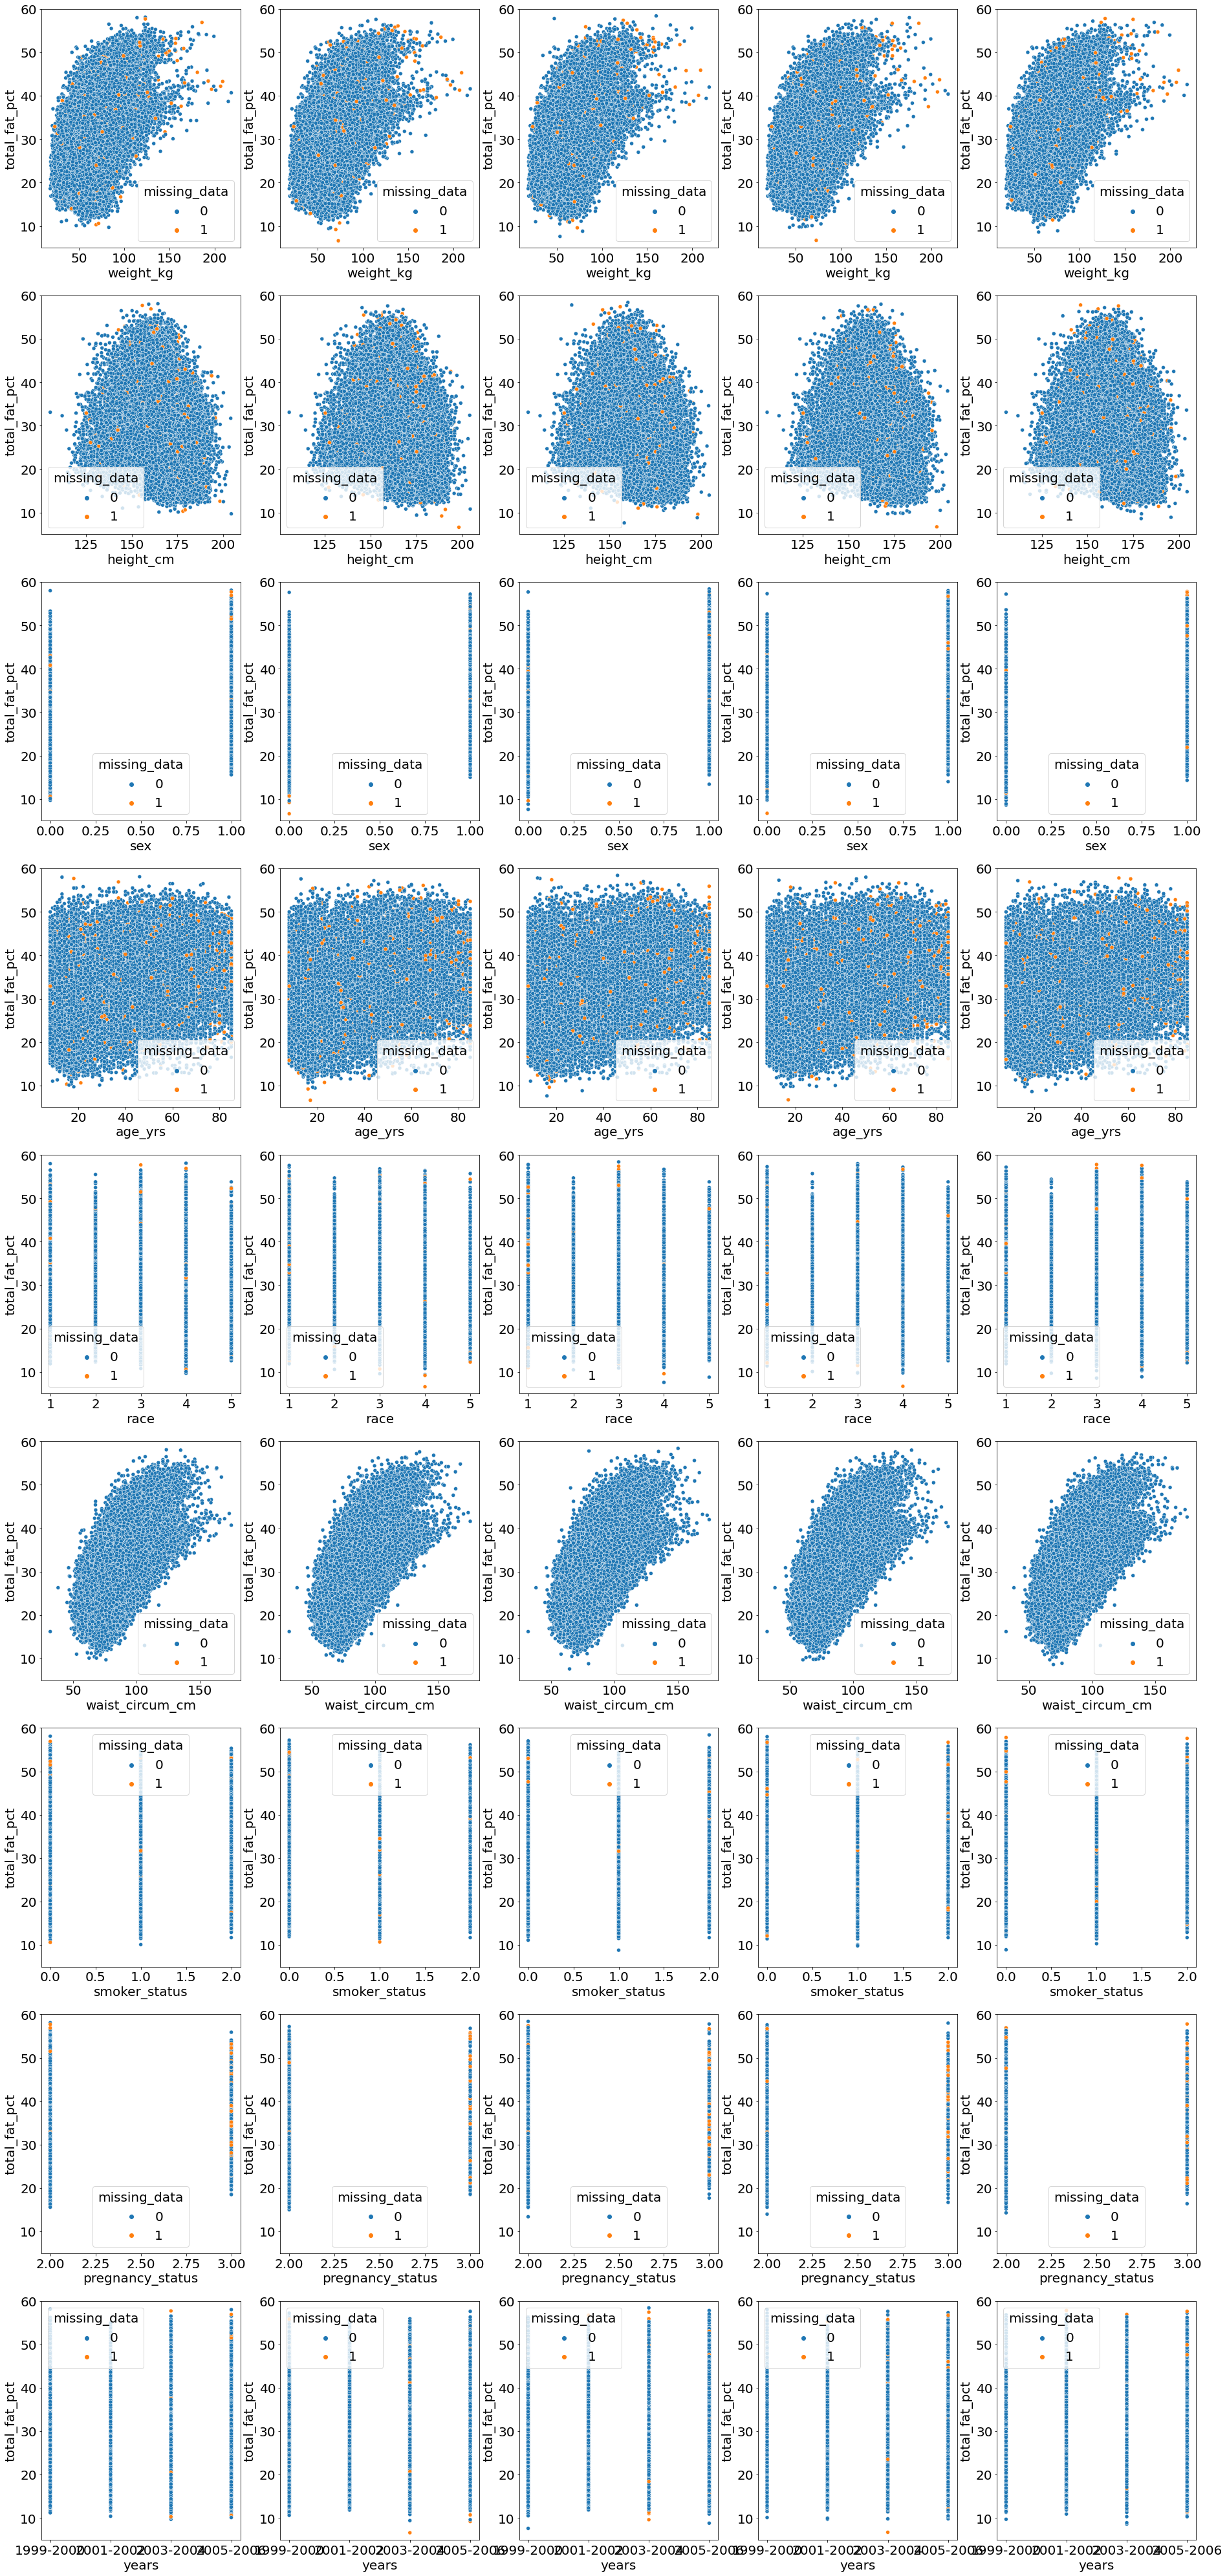

In [53]:
# Initialize plot
plt.rcParams['figure.figsize'] = [32,72]

columns_of_interest = [
    'weight_kg',
    'height_cm',
    'sex',
    'age_yrs',
    'race',
    'waist_circum_cm',
    'smoker_status',
    'pregnancy_status',
    'years'
]

data = [data_M1, data_M2, data_M3, data_M4, data_M5]

fig_waistmissing, ax_waistmissing = plt.subplots(nrows=9, ncols=5)

for i, colname in enumerate(columns_of_interest):
    for j, imputation_data in enumerate(data):
        sns.scatterplot(data=imputation_data, x=colname, y='total_fat_pct', hue='missing_data', ax=ax_waistmissing[i, j])
        ax_waistmissing[i, j].set_ylim(5, 60)

# plt.show()
plt.savefig('./graphs/waist_missing.png')

The only pattern I can find is that there tends to be missing data on the waist circumference on individuals for which the pregnancy status is marked as unknown. Aside from that, the "missingness" of the waist circumference data seems to be random, which is good. It means that there is no known bias associated with the missing data so we can safely drop them.  
  
It is also worth noting (I hadn't noticed this before) that no individuals in this dataset are actually pregnant. Granted, some are marked as "unknown," but there are no individuals confirmed pregnant. This makes sense--I now recall from the NHANES documentation that, as a safety precaution, no X-ray absorptiometry measurements were taken on pregnant individuals. Because of this limitation, we will omit the pregnancy variable from our future analysis and maintain that the algorithm will not yield reliable results for those who are pregnant.

#### Are there any patterns to the missing data in the `'smoker_status'` column?

In [54]:
# Reset 'missing_data' column, match it with missing data in 'smoker_status'
data_M1['missing_data'] = 0
data_M2['missing_data'] = 0
data_M3['missing_data'] = 0
data_M4['missing_data'] = 0
data_M5['missing_data'] = 0
predictors['missing_data'] = 0

predictors.loc[predictors['smoker_status'].isna(), 'missing_data'] = 1
data_M1.loc[data_M1['smoker_status'].isna(), 'missing_data'] = 1
data_M2.loc[data_M2['smoker_status'].isna(), 'missing_data'] = 1
data_M3.loc[data_M3['smoker_status'].isna(), 'missing_data'] = 1
data_M4.loc[data_M4['smoker_status'].isna(), 'missing_data'] = 1
data_M5.loc[data_M5['smoker_status'].isna(), 'missing_data'] = 1

The smoker data is missing on precisely all individuals aged younger than 20 years old. Let's see what the plots look like when we filter out these subjects.

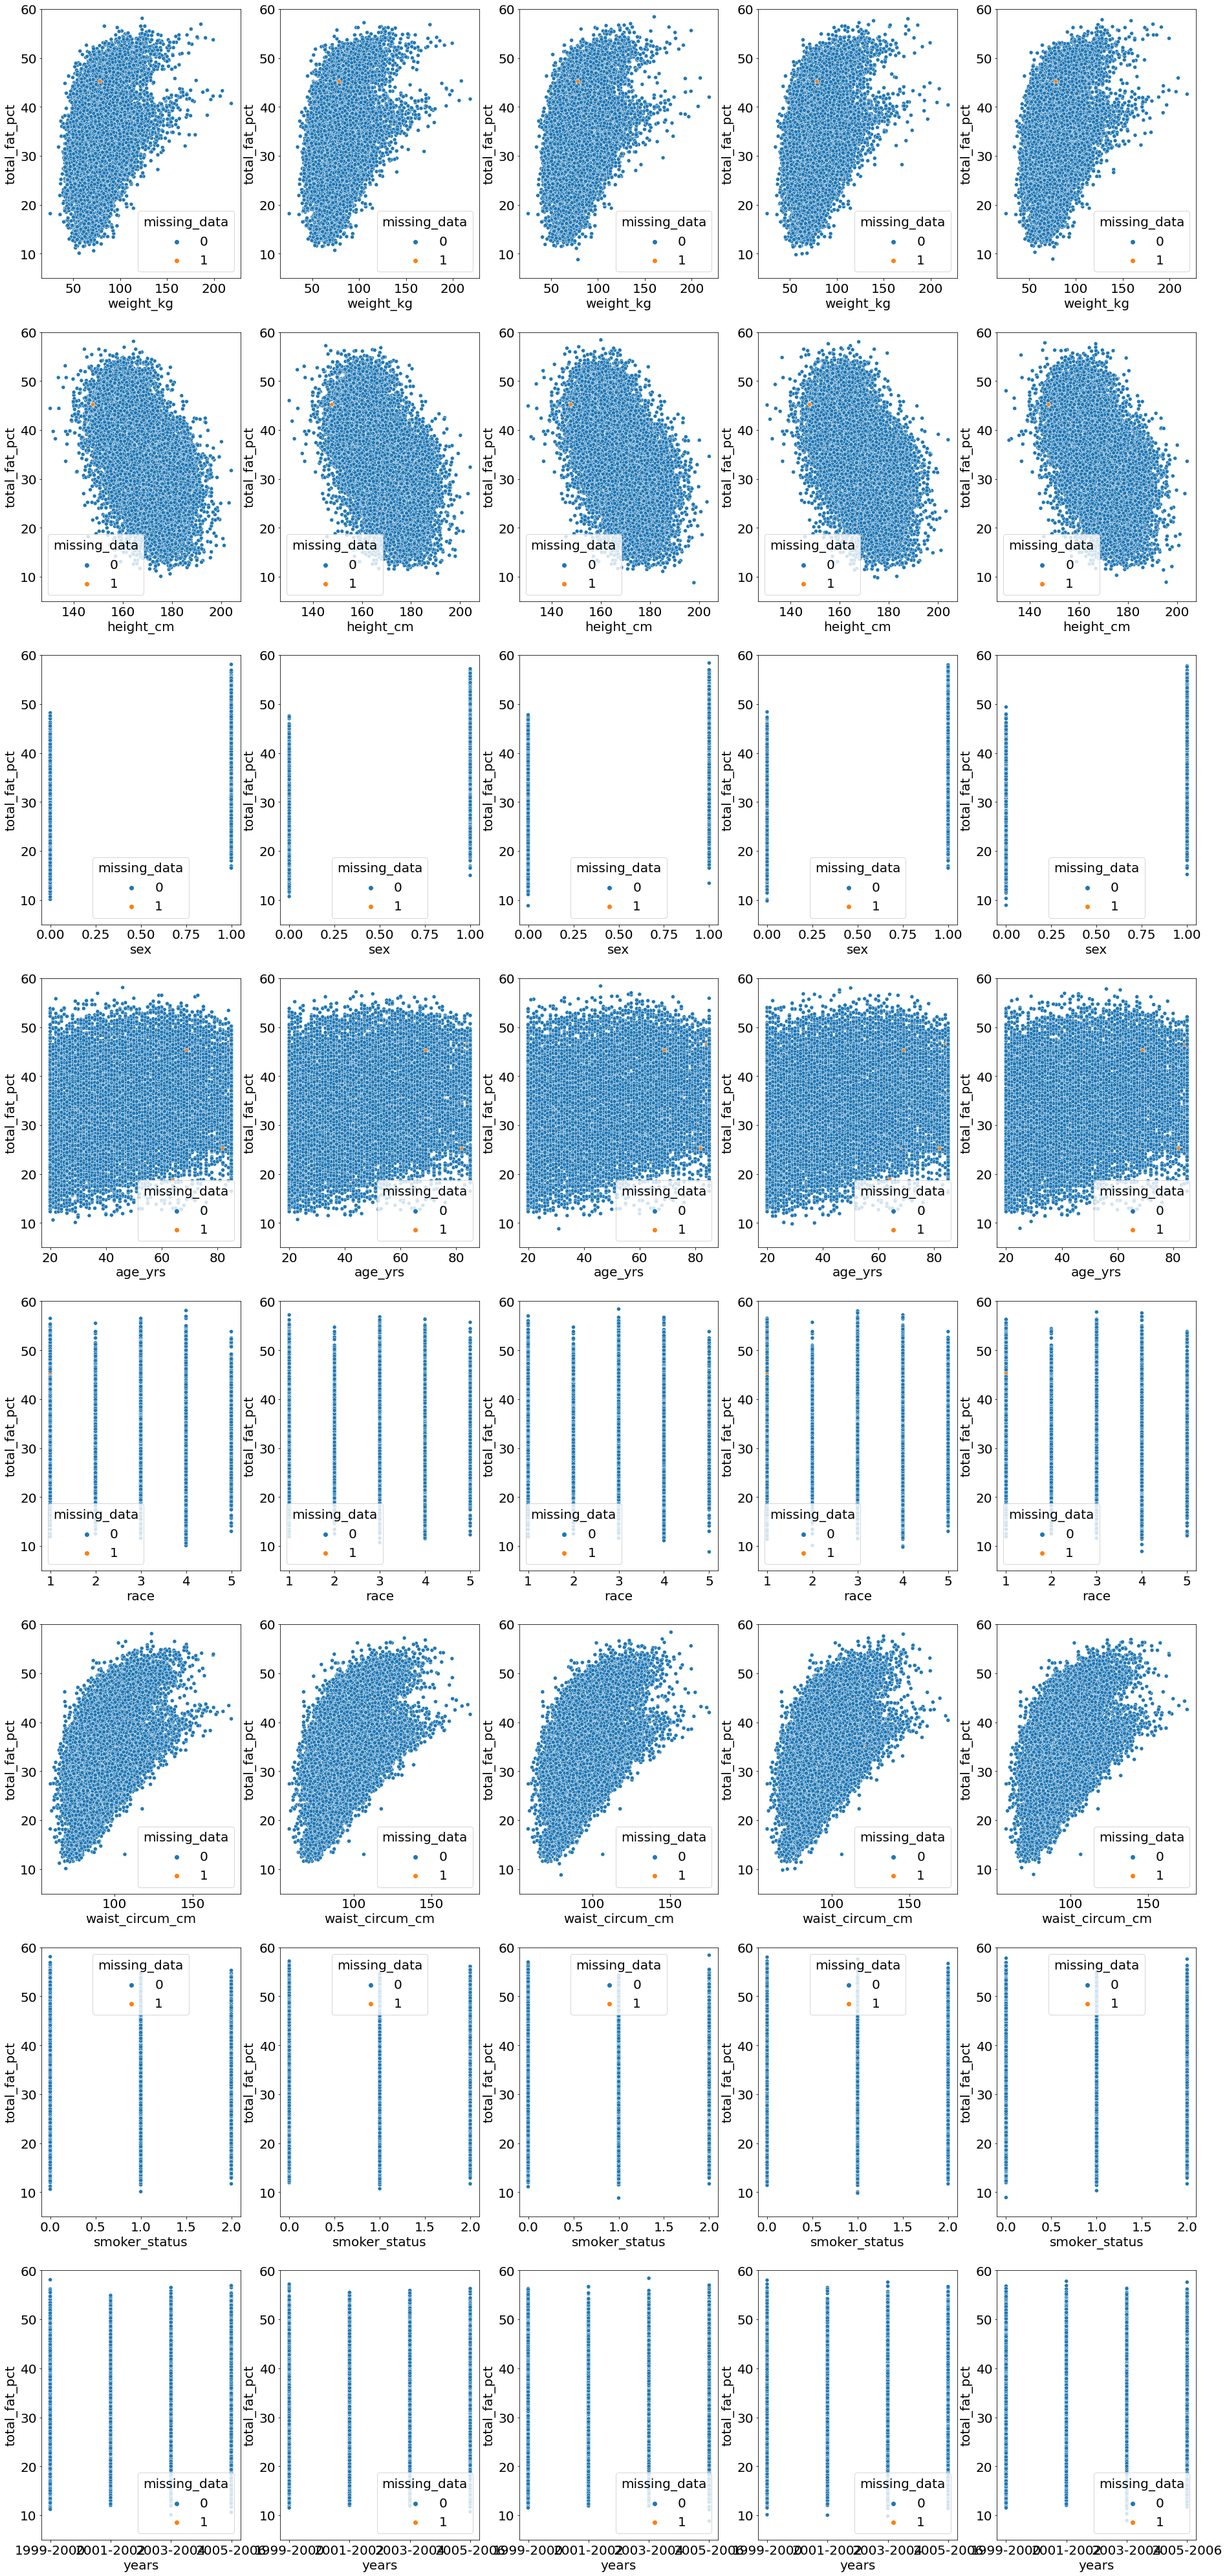

In [56]:
# Initialize plot
plt.rcParams['figure.figsize'] = [32,72]

columns_of_interest = [
    'weight_kg',
    'height_cm',
    'sex',
    'age_yrs',
    'race',
    'waist_circum_cm',
    'smoker_status',
    'years'
]

data = [data_M1, data_M2, data_M3, data_M4, data_M5]

# Filter out subjects younger than 20
data_filtered = []

for dataset in data:
    data_filtered.append(dataset.copy()[dataset['age_yrs'] >= 20])

fig_smokemissing_filtered, ax_smokemissing_filtered = plt.subplots(nrows=8, ncols=5)

for i, colname in enumerate(columns_of_interest):
    for j, imputation_data in enumerate(data_filtered):
        sns.scatterplot(data=imputation_data, x=colname, y='total_fat_pct', hue='missing_data', ax=ax_smokemissing_filtered[i, j])
        ax_smokemissing_filtered[i, j].set_ylim(5, 60)

# plt.show()
plt.savefig('./graphs/smoke_missing_filtered.png')

In [57]:
pd.DataFrame(predictors[predictors['age_yrs'] >= 20].isna().sum(), columns=['Counts'])

Counts
weight_kg              0
height_cm              0
sex                    0
age_yrs                0
race                   0
waist_circum_cm      552
smoker_status         18
pregnancy_status   11818
years                  0
missing_data           0

After filtering out all subjects younger than 20 years old, there are only 18 missing values for the `'smoker_status'` column. These missing data don't appear to have any pattern/bias associated with them. Even if they did exhibit a pattern, there aren't enough of them to introduce significant bias to our dataset.  

Depending on the age limits of the app, it may be safe to drop all subjects younger than 20 years old for the sake of letting a user's history of smoking influence their health score. We won't make a decision about this right now, but it is a tradeoff to keep in mind.

#### Missing data in the `'pregnancy_status'` column
As mentioned above, there are 0 subjects in our dataset who reported to be pregnant at the time of the study, so this column is basically worthless for our purposes. We will drop it entirely and therefore will not have to worry about the large number of missing fields in it.

### Update datasets to account for missing data

Run this code in `02-data_cleaning.py`:

```
predictors_updated = predictors.drop(['pregnancy_status', 'missing_data'], axis=1)
predictors_updated = predictors_updated[predictors_updated['waist_circum_cm'].notna()]
predictors_updated.to_csv('./data_cleaned/predictors.csv')

for M_num, dataset in enumerate(data):
    dataset_updated = dataset.drop(['pregnancy_status', 'missing_data'], axis=1)
    dataset_updated = dataset_updated[dataset_updated['waist_circum_cm'].notna()]
    dataset_updated.to_csv('./data_cleaned/M' + str(M_num+1) + '_data.csv')
```
